# Gait analysis (two-dimensional)

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

## Forward and inverse dynamics

With respect to the equations of motion to determine the dynamics of a system, there are two general approaches: forward (or direct) and inverse dynamics. For example, consider the solution of Newton's second law for a particle. If we know the force(s) and want to find the trajectory, this is **forward dynamics**. If instead, we know the trajectory and want to find the force(s), this is **inverse dynamics**:

<figure><img src="./../images/dynamics.png" alt="Forward and inverse dynamics." width=220/><figcaption><i><center>Figure. The equation of motion and the forward and inverse dynamics approaches.</center></i></figcaption>

In Biomechanics, in a typical movement analysis of the human body using inverse dynamics, we would measure the positions of the segments and measure the external forces, calculate the segments' linear and angular acceleration, and find the internal net force and moment of force at the joint using the equations of motion. In addition, we could estimate the muscle forces (if we solve the redundancy problem of having more muscles than joints).  
Using forward dynamics, the muscle forces would be the inputs and the trajectories of the segments would be the outputs. The figure below compares the forward and inverse dynamics approaches.

<figure><img src="./../images/InvDirDyn.png" alt="Direct and inverse dynamics."/><figcaption><i><center>Figure. Inverse dynamics and Forward (or Direct) dynamics approaches for movement analysis (adapted from Zajac and Gordon, 1989).</center></i></figcaption>

## Gait analysis using inverse dynamics

Let's estimate the joint force and moments of force at the lower limb during locomotion using the inverse dynamics approach.   
We will model the lower limbs at the right side as composed by three rigid bodies (foot, leg, and thigh) articulated by three hinge joints (ankle, knee, and hip) and perform a two-dimensional analysis.   

The [free body diagrams](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/FreeBodyDiagram.ipynb) of the lower limbs are:  
<br>
<figure><img src="./../images/fbdgaitb.png" width=640 alt="FBD lowerlimb"/><figcaption><center><i>Figure. Free body diagrams of the lower limbs during gait.</i></center></figcaption>   

The equilibrium equations for the forces and moments of force around the center of mass are:   

For body 1 (foot):


$$ \begin{array}{l l}
\mathbf{F_1} + m_1\mathbf{g} + \mathbf{GRF} = m_1\mathbf{a_1} \\
\\
\mathbf{M_1} + \mathbf{r_{cmp1}}\times\mathbf{F_1} + \mathbf{r_{cmCOP}}\times\mathbf{GRF} = I_1\mathbf{\alpha_1} 
\end{array} $$

For body 2 (leg):

$$ \begin{array}{l l}
\mathbf{F_2} + m_2\mathbf{g} - \mathbf{F_1} = m_2\mathbf{a_2} \\
\\
\mathbf{M_2} + \mathbf{r_{cmp2}}\times\mathbf{F_2} + \mathbf{r_{cmd2}}\times-\mathbf{F_{1}} - \mathbf{M_1} = I_2\mathbf{\alpha_2}
\end{array} $$

For body 3 (thigh):

$$ \begin{array}{l l}
\mathbf{F_3} + m_3\mathbf{g} - \mathbf{F_2} = m_3\mathbf{a_3} \\
\\
\mathbf{M_3} + \mathbf{r_{cmp3}}\times\mathbf{F_3} + \mathbf{r_{cmd3}}\times-\mathbf{F_{2}} - \mathbf{M_2} = I_3\mathbf{\alpha_3}
\end{array} $$

Where **p** and **d** stands for proximal and distal joints (with respect to the fixed extremity), $\mathbf{r_{cm\:ji}}$ is the position vector from the center of mass of body **i** to the joint **j**, **COP** is the position of application of the ground reaction force (GRF), $\mathbf{\alpha}$ is the angular acceleration, and g= -9.8 m/s$^2.$

Note that the pattern of the equations is the same for the three segments: distal and proximal forces and moments of force and the weight force are present in all segments.   
The only exception is with the foot in contact with the ground. As the ground only pushes the foot, it can not generate a moment of force over the foot. Because of that we model the interaction foot-ground as a resultant ground reaction force (GRF) applied on the foot at the center of pressure (COP) position.   

Both GRF and COP quantities are measured with a force platform and are assumed as known quantities.    
Because of that the system of equations above is only solvable if we start by the body 1, from bottom to top.   

The system of equations above is simple and straightforward to solve, it is just a matter of being systematic.   
We start by segment 1, find $\mathbf{F_1}$ and $\mathbf{M_1}$, substitute these values on the equations for segment 2, find $\mathbf{F_2}$ and $\mathbf{M_2}$, substitute them in the equations for segment 3 and find $\mathbf{F_3}$ and $\mathbf{M_3}\:$:  

For body 1 (foot):
    
$$ \begin{array}{l l}
\mathbf{F_1} = m_1\mathbf{a_1} - m_1\mathbf{g} - \mathbf{GRF} \\
\\
\mathbf{M_1} = I_1\mathbf{\alpha_1} - \mathbf{r_{cmp1}}\times\left(m_1\mathbf{a_1} - m_1\mathbf{g} - \mathbf{GRF}\right) - \mathbf{r_{cmCOP}}\times\mathbf{GRF}
\end{array} $$

For body 2 (leg):

$$ \begin{array}{l l}
\mathbf{F_2} = m_1\mathbf{a_1} + m_2\mathbf{a_2} - (m_1+m_2)\mathbf{g} - \mathbf{GRF} \\
\\
\mathbf{M_2} = I_1\mathbf{\alpha_1} + I_2\mathbf{\alpha_2} - \mathbf{r_{cmp2}}\times\left(m_1\mathbf{a_1} + m_2\mathbf{a_2} - (m_1+m_2)\mathbf{g} - \mathbf{GRF}\right) + \mathbf{r_{cgd2}}\times\left(m_1\mathbf{a_1} - m_1\mathbf{g} - \mathbf{GRF}\right) - \mathbf{r_{cmp1}}\times\left(m_1\mathbf{a_1} - m_1\mathbf{g} - \mathbf{GRF}\right) - \mathbf{r_{cmCOP}}\times\mathbf{GRF}
\end{array} $$

For body 3 (thigh):

$$ \begin{array}{l l}
\mathbf{F_3} = m_1\mathbf{a_1} + m_2\mathbf{a_2} + m_3\mathbf{a_3} - (m_1+m_2+m_3)\mathbf{g} - \mathbf{GRF} \\
\\
\mathbf{M_3} = I_1\mathbf{\alpha_1} + I_2\mathbf{\alpha_2} + I_3\mathbf{\alpha_3} - \mathbf{r_{cmp3}}\times\left(m_1\mathbf{a_1} + m_2\mathbf{a_2} + m_3\mathbf{a_3} - (m_1+m_2+m_3)\mathbf{g} - \mathbf{GRF}\right) + \mathbf{r_{cmd3}}\times\left(m_1\mathbf{a_1} + m_2\mathbf{a_2} - (m_1+m_2)\mathbf{g} - \mathbf{GRF}\right) - \mathbf{r_{cmp2}}\times\left(m_1\mathbf{a_1} + m_2\mathbf{a_2} - (m_1+m_2)\mathbf{g} - \mathbf{GRF}\right) + \mathbf{r_{cmd2}}\times\left(m_1\mathbf{a_1} - m_1\mathbf{g} - \mathbf{GRF}\right) - \mathbf{r_{cmp1}}\times\left(m_1\mathbf{a_1} - m_1\mathbf{g} - \mathbf{GRF}\right) - \mathbf{r_{cmCOP}}\times\mathbf{GRF}
\end{array} $$

### The recursive approach for inverse dynamics of multi-body systems

The calculation above is tedious, error prone, useless, and probably it's wrong.  

To make some use of it, we can clearly see that forces act on far segments, which are not directly in contact with these forces. In fact, this is true for all stuff happening on a segment: note that $\mathbf{F_1}$ and $\mathbf{M_1}$ are present in the expression for $\mathbf{F_3}$ and $\mathbf{M_3}$ and that the acceleration of segment 1 matters for the calculations of segment 3.   

Instead, we can use the power of computer programming (like this one right now!) and solve these equations recursively hence they have the same pattern.   

We could write a function that it would have as inputs the body-segment parameters, the kinematic data, and the distal joint force and moment of force and output the proximal joint force and moment of force.   
Then, we would call this function for each segment, starting with the segment that has a free extremity or that has the force and moment of force measured by some instrument (i,e, use a force plate for the foot-ground interface).  
This function would be called in the following manner:   

```python
    Fp, Mp = invdyn2d(rcm, rd, rp, acm, alfa, mass, Icm, Fd, Md)
```   

So, let's write such function:

In [ ]:
# %load ./../functions/invdyn2d.py
"""Two-dimensional inverse-dynamics calculations of one segment."""

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'invdyn2d.py v.2 2015/11/13'


def invdyn2d(rcm, rd, rp, acm, alpha, mass, Icm, Fd, Md):
    """Two-dimensional inverse-dynamics calculations of one segment

    Parameters
    ----------
    rcm   : array_like [x,y]
            center of mass position (y is vertical)
    rd    : array_like [x,y]
            distal joint position
    rp    : array_like [x,y]
            proximal joint position
    acm   : array_like [x,y]
            center of mass acceleration
    alpha : array_like [x,y]
            segment angular acceleration
    mass  : number
            mass of the segment   
    Icm   : number
            rotational inertia around the center of mass of the segment
    Fd    : array_like [x,y]
            force on the distal joint of the segment
    Md    : array_like [x,y]
            moment of force on the distal joint of the segment
    
    Returns
    -------
    Fp    : array_like [x,y]
            force on the proximal joint of the segment (y is vertical)
    Mp    : array_like [x,y]
            moment of force on the proximal joint of the segment

    Notes
    -----
    To use this function recursevely, the outputs [Fp, Mp] must be inputed as 
    [-Fp, -Mp] on the next call to represent [Fd, Md] on the distal joint of the
    next segment (action-reaction).
    
    This code was inspired by a similar code written by Ton van den Bogert [1]_.
    See this notebook [2]_.

    References
    ----------
    .. [1] http://isbweb.org/data/invdyn/index.html
    .. [2] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/GaitAnalysis2D.ipynb

    """
    
    from numpy import cross
     
    g = 9.80665  # m/s2, standard acceleration of free fall (ISO 80000-3:2006)
    # Force and moment of force on the proximal joint
    Fp = mass*acm - Fd - [0, -g*mass]
    Mp = Icm*alpha - Md - cross(rd-rcm, Fd) - cross(rp-rcm, Fp)
    
    return Fp, Mp

The calculations are implemented in only two lines of code at the end, the first part of the code is the help on how to use the function. The help is long because it's supposed to be helpful :), see the [style guide for NumPy/SciPy documentation](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt). 

The real problem is to measure or estimate the experimental variables: the body-segment parameters, the ground reaction forces, and the kinematics of each segment. For such, it is necessary some expensive equipments, but they are typical of a biomechanics laboratory.   

### Experimental data

Let's work with some data of kinematic position of the segments and ground reaction forces in order to compute the joint forces and moments of force.   
The data we will work are in fact from a computer simulation of running created by Ton van den Bogert. The nice thing about these data is that as a simulation, the true joint forces and moments of force are known and we will be able to compare our estimation with these true values.   
All the data can be downloaded from a page at the [ISB website](http://isbweb.org/data/invdyn/index.html):

In [2]:
from IPython.display import IFrame
IFrame('http://isbweb.org/data/invdyn/index.html', width='100%', height=400)

In [1]:
# import the necessary libraries
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'./../functions')

### Load data file

In [2]:
# load file with ground reaction force data
grf = np.loadtxt('./../data/all.frc') # [Fx, Fy, COPx]
# load file with kinematic data
kin = np.loadtxt('./../data/all.kin') # [Hip(x,y), knee(x,y), ankle(x,y), toe(x,y)] 
freq = 10000
time = np.linspace(0, grf.shape[0]/freq, grf.shape[0])

### Filtering

In [3]:
# this is simulated data with no noise, filtering doesn't matter
if False:
    # filter data
    from scipy.signal import butter, filtfilt
    # Butterworth filter
    b, a = butter(2, (100/(freq/2)))
    for col in np.arange(grf.shape[1]-1):
        grf[:, col]  = filtfilt(b, a, grf[:, col])
    b, a = butter(2, (100/(freq/2)))
    for col in np.arange(kin.shape[1]):    
        kin[:, col] = filtfilt(b, a, kin[:, col])

### Selection

In [4]:
# heel strike occurs at sample 3001
time = time[3001 - int(freq/40):-int(freq/20)]
grf, kin = grf[3001 - int(freq/40):-int(freq/20), :], kin[3001 - int(freq/40):-int(freq/20), :]

### Plot file data

<IPython.core.display.Javascript object>


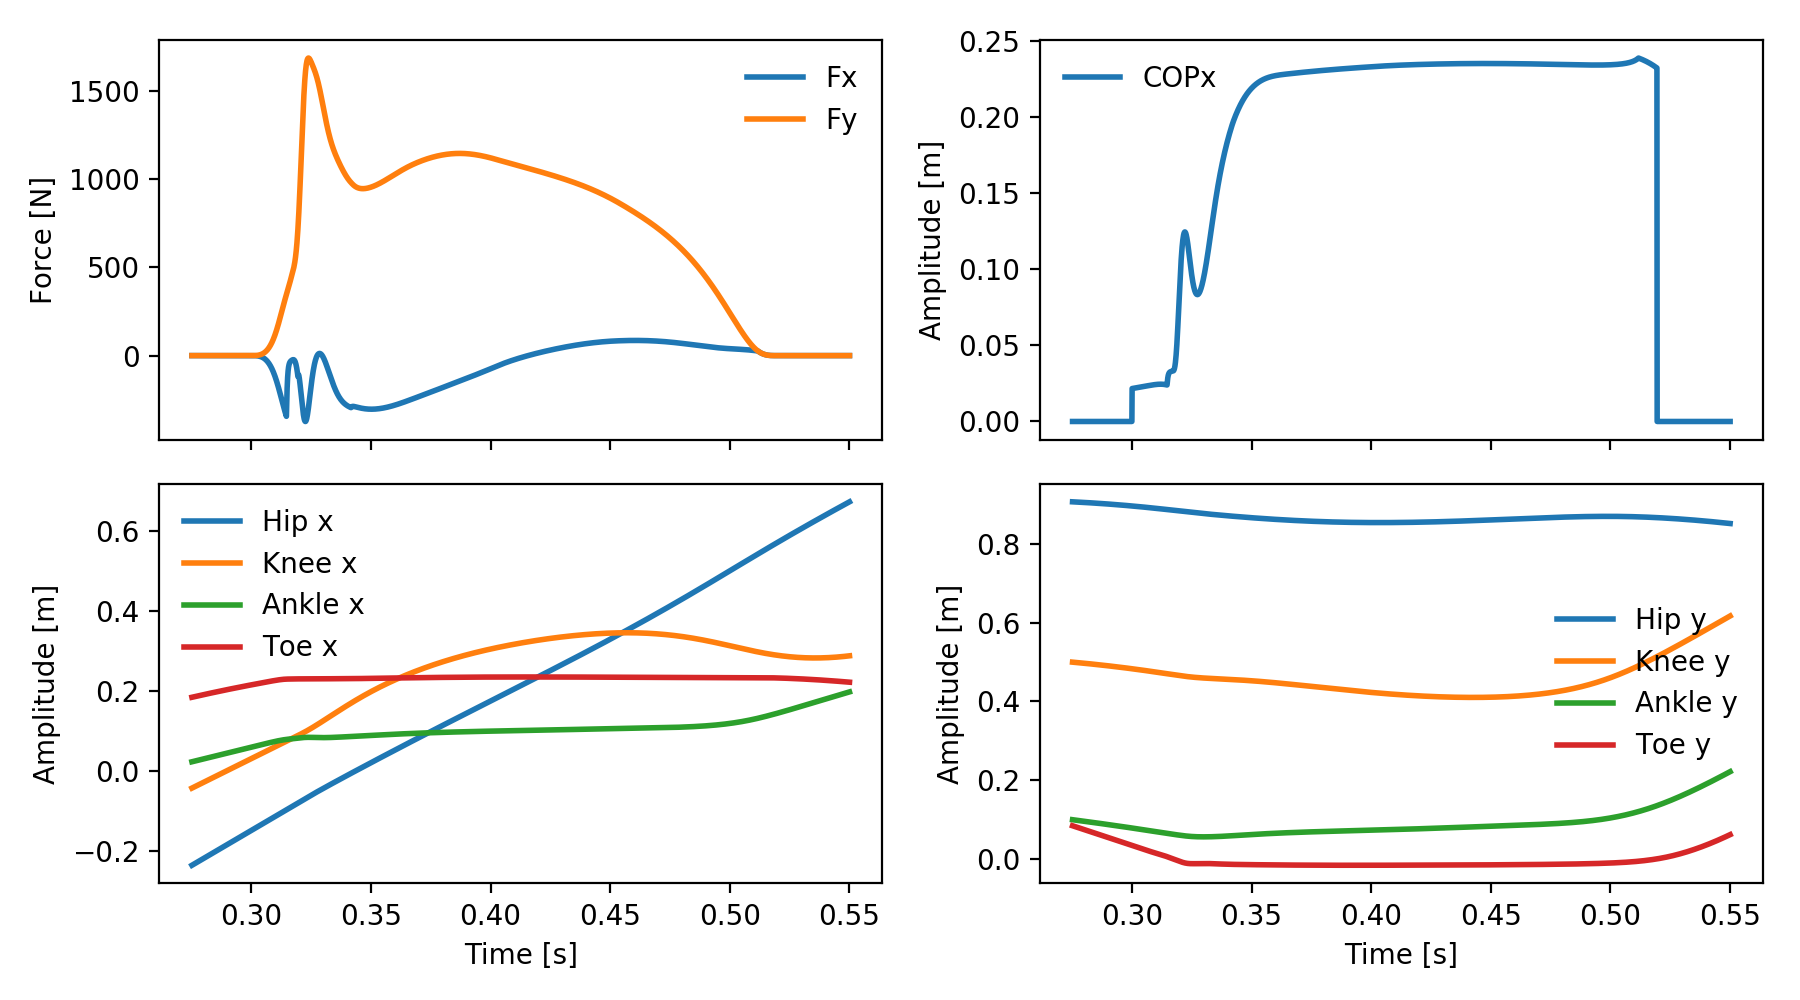

In [8]:
# plot data
hfig, hax = plt.subplots(2, 2, sharex = True, squeeze=True, figsize=(9, 5))
hax[0, 0].plot(time, grf[:, [0, 1]], linewidth=2)
hax[0, 0].legend(('Fx','Fy'), frameon=False)
hax[0, 0].set_ylabel('Force [N]')
hax[0, 1].plot(time, grf[:, 2], linewidth=2)
hax[0, 1].legend(['COPx'], frameon=False)
hax[0, 1].set_ylabel('Amplitude [m]')
hax[1, 0].plot(time, kin[:, 0::2], linewidth=2)
hax[1, 0].legend(('Hip x','Knee x','Ankle x','Toe x'), frameon=False)
hax[1, 0].set_ylabel('Amplitude [m]')
hax[1, 1].plot(time, kin[:, 1::2], linewidth=2)
hax[1, 1].legend(('Hip y','Knee y','Ankle y','Toe y'), frameon=False)
hax[1, 1].set_ylabel('Amplitude [m]')
hax[1, 0].set_xlabel('Time [s]'), hax[1, 1].set_xlabel('Time [s]')
plt.tight_layout()
plt.show()

### Body-segment parameters 

In [6]:
# body-segment parameters [thigh, shank, foot]
mass = [6.85, 2.86, 1.00]                 # mass [kg]
Icm  = [0.145361267, 0.042996389, 0.0200] # rotational inertia [kg.m2]
cmpr = [0.4323725, 0.4334975, 0.0]        # CM [m] wrt. prox. joint [frac. of segment length]

### Kinematic calculations

In [7]:
# Kinematic data
# center of mass position of the thigh, shank, foot segments
rcm = np.hstack((kin[:, (0, 1)] + cmpr[0]*(kin[:, (2, 3)] - kin[:, (0, 1)]),
                 kin[:, (2, 3)] + cmpr[1]*(kin[:, (4, 5)] - kin[:, (2, 3)]),
                 kin[:, (4, 5)] + cmpr[2]*(kin[:, (6, 7)] - kin[:, (4, 5)])))

# center of mass linear acceleration of the thigh, shank, foot segments
acm = np.diff(rcm, n=2, axis=0)*freq*freq
acm = np.vstack((acm, acm[-1, :], acm[-1, :]))

# thigh, shank, foot segment angle
ang = np.vstack((np.arctan2(kin[:, 1] - kin[:, 3], kin[:, 0] - kin[:, 2]),
                 np.arctan2(kin[:, 3] - kin[:, 5], kin[:, 2] - kin[:, 4]),
                 np.arctan2(kin[:, 5] - kin[:, 7], kin[:, 4] - kin[:, 6]))).T

# hip, knee, and ankle joint angles
angj = np.vstack((-(ang[:, 0]-ang[:, 1]), np.unwrap(ang[:, 1] - ang[:, 2] + np.pi/2))).T*180/np.pi

# thigh, shank, foot segment angular acceleration
aang = np.diff(ang, n=2, axis=0)*freq*freq
aang = np.vstack((aang, aang[-1, :], aang[-1, :]))

### Plot joint angles

<IPython.core.display.Javascript object>


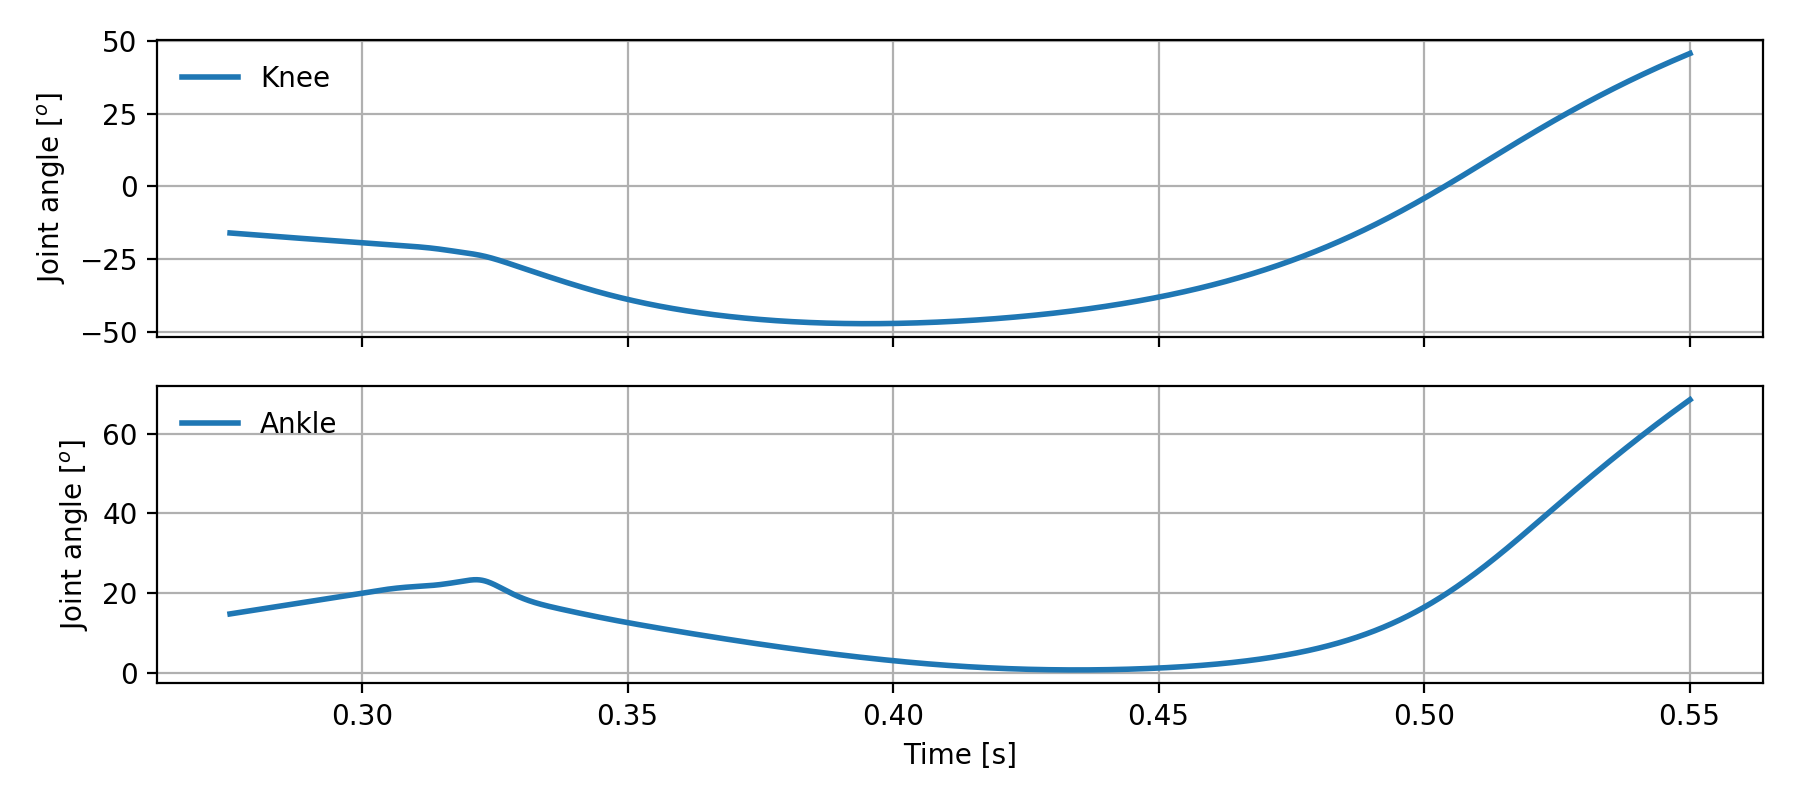

In [10]:
# plot hip, knee, and ankle joint angles
hfig, (hax1, hax2) = plt.subplots(2, 1, sharex = True, squeeze=True, figsize=(9, 4))
hax1.plot(time, angj[:, 0], linewidth=2, label='Knee')
hax1.legend(frameon=False, loc='upper left'), hax1.grid()
hax2.plot(time, angj[:, 1], linewidth=2, label='Ankle')
hax2.legend(frameon=False, loc='upper left'), hax2.grid()
hax1.set_ylabel('Joint angle $[^o]$')
hax2.set_ylabel('Joint angle $[^o]$')
hax2.set_xlabel('Time [s]')
plt.tight_layout()
plt.show()

### Inverse dynamics calculations

In [11]:
# inverse dynamics
# invdyn2d(rcm, rd, rp, acm, alpha, mass, Icm, Fd, Md)
from invdyn2d import invdyn2d

# ankle
[Fa, Ma] = invdyn2d(rcm[:, (4, 5)], grf[:, (2, 2)]*[1, 0], kin[:, (4, 5)], acm[:, (4, 5)], \
                   aang[:, 2], mass[2], Icm[2], grf[:, (0, 1)], 0)
# knee
[Fk, Mk] = invdyn2d(rcm[:,(2, 3)], kin[:, (4, 5)], kin[:, (2, 3)], acm[:, (2, 3)], \
                   aang[:,1], mass[1], Icm[1], -Fa, -Ma)
# hip
[Fh, Mh] = invdyn2d(rcm[:, (0, 1)], kin[:, (2, 3)], kin[:, (0, 1)], acm[:, (0, 1)], \
                   aang[:, 0], mass[0], Icm[0], -Fk, -Mk)

# magnitude of the calculated hip, knee, and ankle resultant joint force
Fam = np.sqrt(np.sum(np.abs(Fa)**2, axis=-1))
Fkm = np.sqrt(np.sum(np.abs(Fk)**2, axis=-1))
Fhm = np.sqrt(np.sum(np.abs(Fh)**2, axis=-1))

### Load files with true joint forces and moments of force

In [12]:
# load file with true joint forces and moments of force
forces  = np.loadtxt('./../data/all.fmg') # [Hip, knee, ankle]
moments = np.loadtxt('./../data/all.mom') # [Hip, knee, ankle]
#heel strike occurs at sample 3001
forces, moments = forces[3001-int(freq/40):-int(freq/20), :], moments[3001-int(freq/40):-int(freq/20), :] 

### Plot calculated variables and their true values

Let's plot these data but because later we will need to plot similar plots, let's create a function for the plot to avoid repetition of code:

<IPython.core.display.Javascript object>


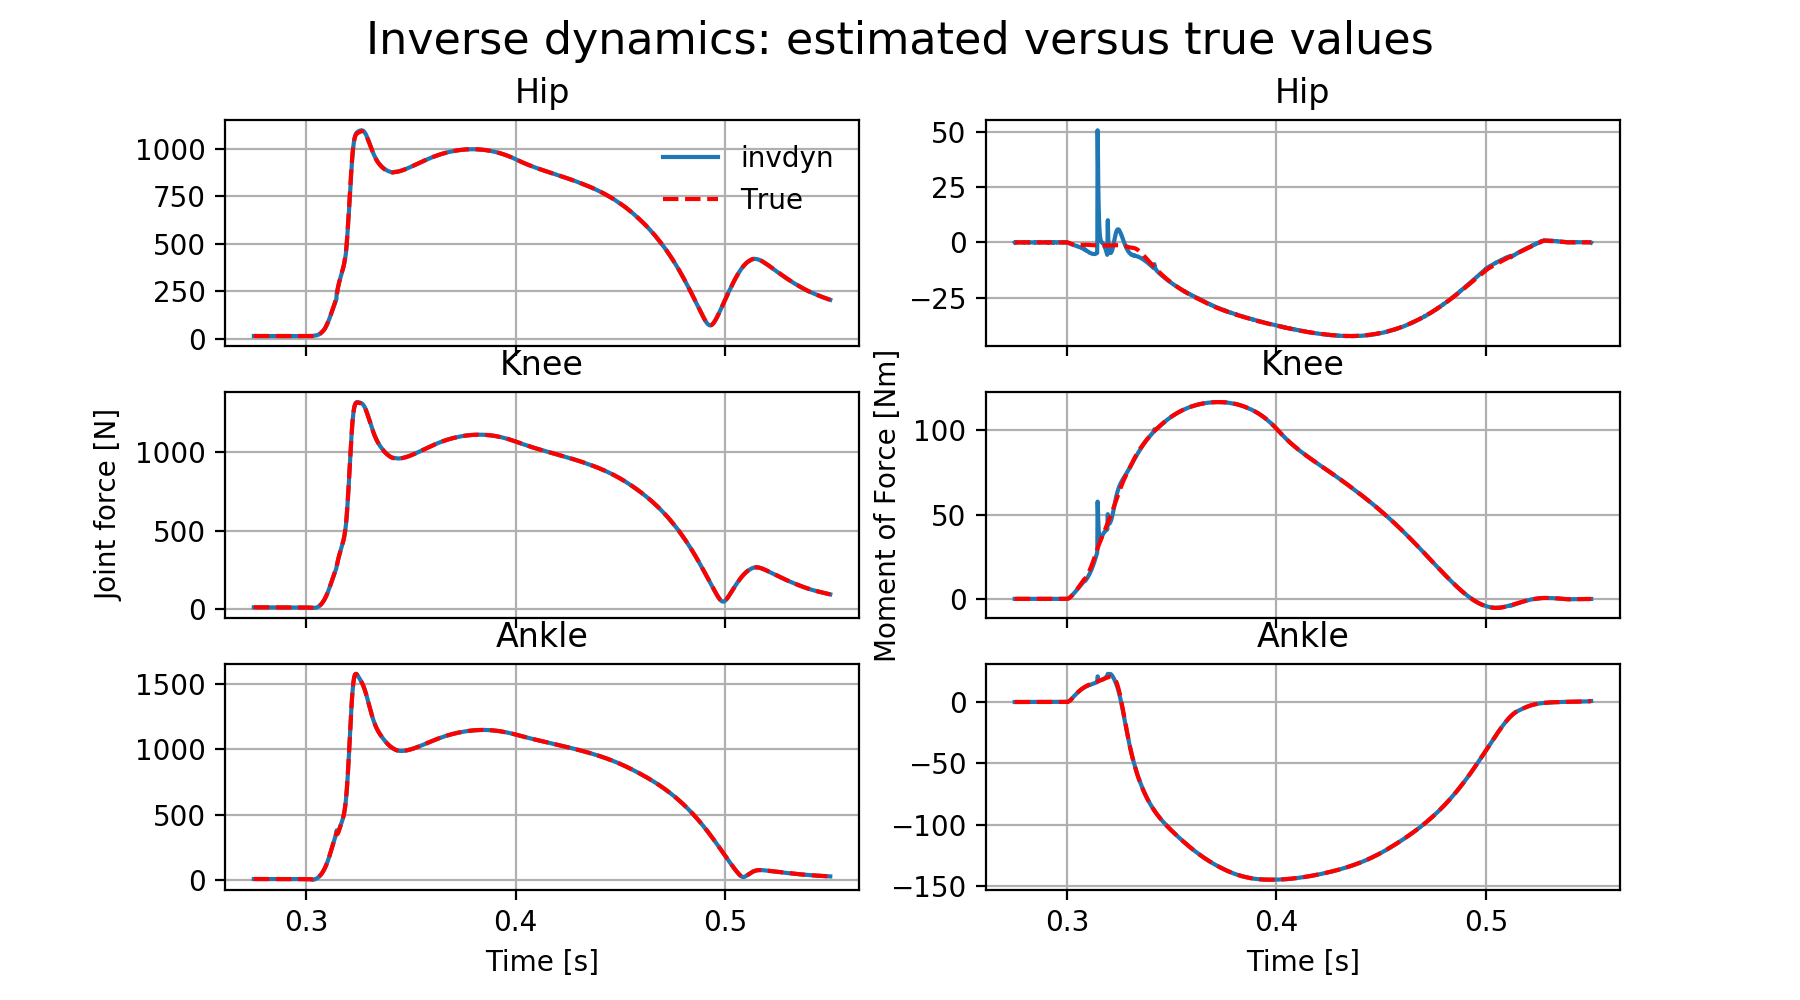

In [15]:
def plotdata(time, Fh, Fk, Fa, Mh, Mk, Ma, forces, moments, stitle):
    # plot hip, knee, and ankle moments of force
    hfig, hax = plt.subplots(3, 2, sharex = True, squeeze=True, figsize=(9, 5))
    # forces
    hax[0, 0].plot(time, Fh, label='invdyn'), hax[0, 0].set_title('Hip')
    hax[1, 0].plot(time, Fk), hax[1, 0].set_title('Knee')
    hax[2, 0].plot(time, Fa), hax[2, 0].set_title('Ankle')
    hax[1, 0].set_ylabel('Joint force [N]')
    hax[2, 0].set_xlabel('Time [s]')
    # moments of force
    hax[0, 1].plot(time, Mh), hax[0, 1].set_title('Hip')
    hax[1, 1].plot(time, Mk), hax[1, 1].set_title('Knee')
    hax[2, 1].plot(time, Ma), hax[2, 1].set_title('Ankle')
    hax[1, 1].set_ylabel('Moment of Force [Nm]')
    hax[2, 1].set_xlabel('Time [s]')
    # true joint forces and moments of force
    hax[0, 0].plot(time,  forces[:, 0], 'r--', label='True'), hax[0, 0].legend(frameon=False) 
    hax[1, 0].plot(time,  forces[:, 1], 'r--') 
    hax[2, 0].plot(time,  forces[:, 2], 'r--')
    hax[0, 1].plot(time, moments[:, 0], 'r--') 
    hax[1, 1].plot(time, moments[:, 1], 'r--') 
    hax[2, 1].plot(time, moments[:, 2], 'r--')
    plt.suptitle(stitle, fontsize=16)
    for x in hax.flat:
        x.locator_params(nbins=5); x.grid()
    plt.show()
    
plotdata(time, Fhm, Fkm, Fam, Mh, Mk, Ma, forces, moments, 
         'Inverse dynamics: estimated versus true values')

The results are very similar; only a small part of the moments of force is different because of some noise.

## Contribution of each term to the joint force and moment of force 

Let's see what happens with the joint forces and moments of force when we neglect the contribution of some terms in the inverse dynamics analysis of these data. 

#### Quasi-static analysis
Consider the case where the segment acceleration is neglected:

<IPython.core.display.Javascript object>


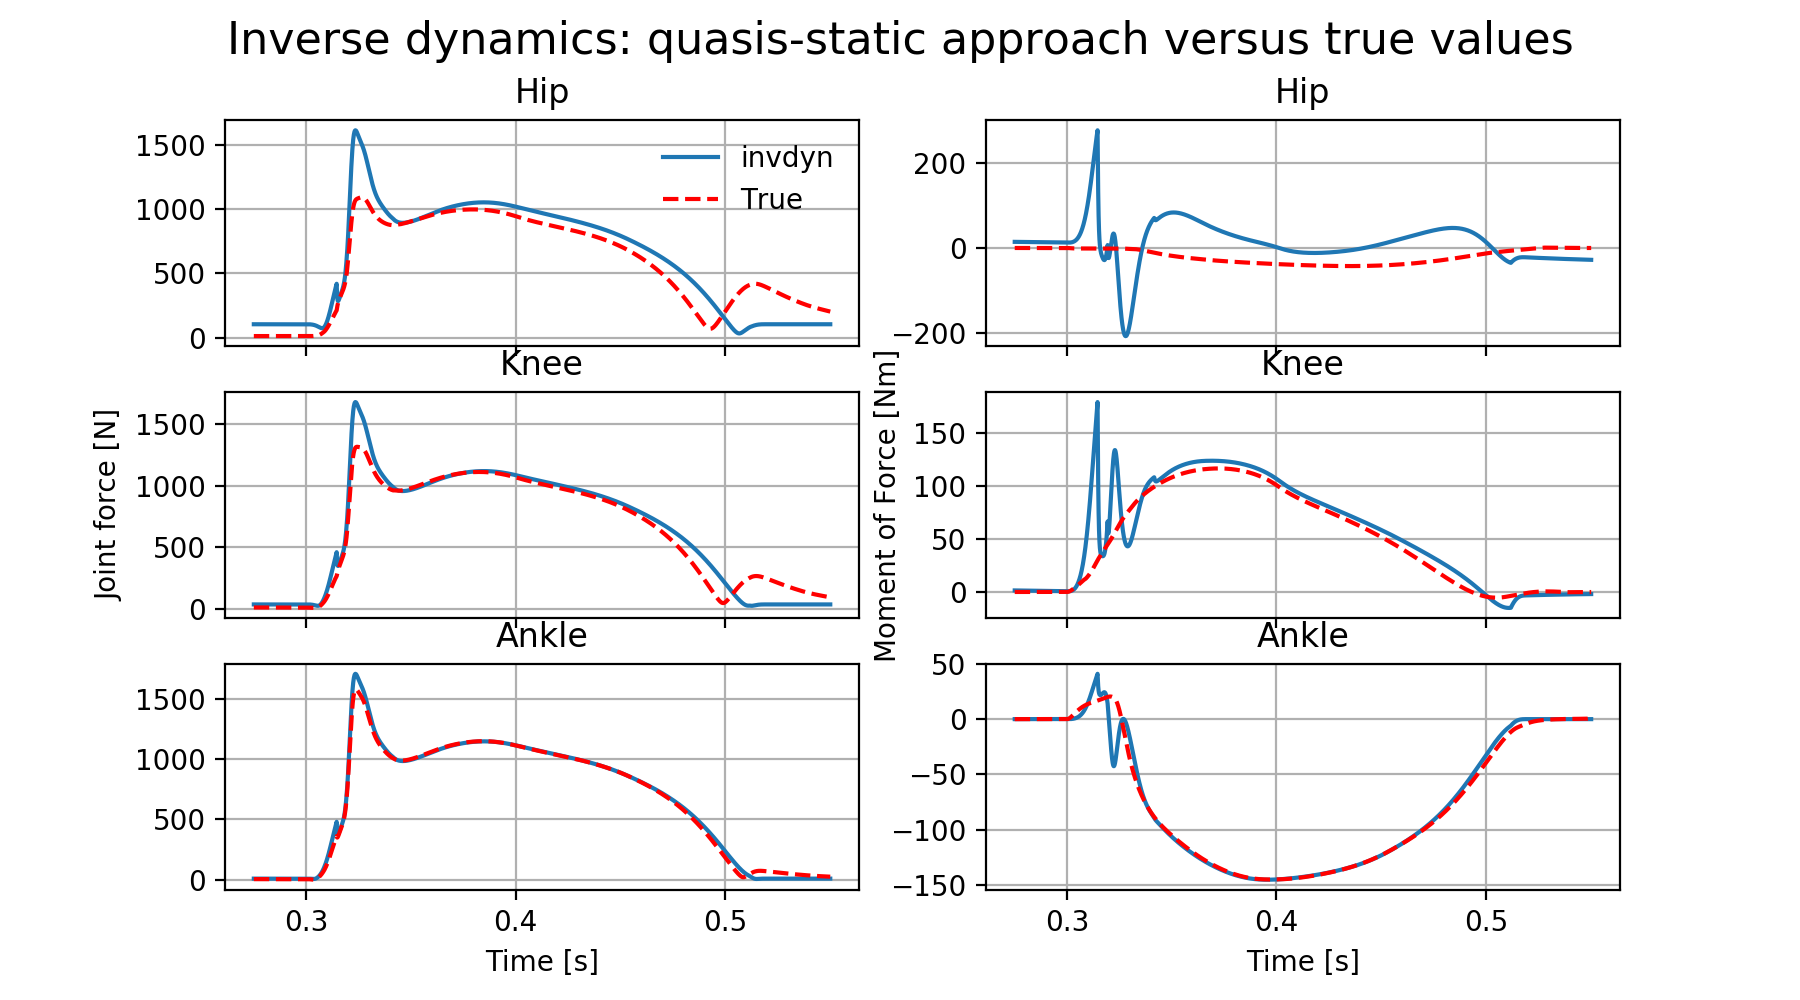

In [16]:
# ankle
[Fast, Mast] = invdyn2d(rcm[:, (4, 5)], grf[:, (2, 2)]*[1, 0], kin[:,(4, 5)], acm[:, (4, 5)]*0, \
                        aang[:,2]*0, mass[2], Icm[2], grf[:, (0, 1)], 0)
# knee
[Fkst, Mkst] = invdyn2d(rcm[:, (2, 3)], kin[:,(4, 5)], kin[:, (2, 3)], acm[:, (2, 3)]*0, \
                        aang[:, 1]*0, mass[1], Icm[1], -Fast, -Mast)
# hip
[Fhst, Mhst] = invdyn2d(rcm[:, (0, 1)], kin[:,(2, 3)], kin[:, (0, 1)], acm[:, (0, 1)]*0, \
                        aang[:,0]*0, mass[0], Icm[0], -Fkst, -Mkst)

# magnitude of the calculated hip, knee, and ankle resultant joint force
Fastm = np.sqrt(np.sum(np.abs(Fast)**2, axis=-1))
Fkstm = np.sqrt(np.sum(np.abs(Fkst)**2, axis=-1))
Fhstm = np.sqrt(np.sum(np.abs(Fhst)**2, axis=-1))

plotdata(time, Fhstm, Fkstm, Fastm, Mhst, Mkst, Mast, forces, moments, 
         'Inverse dynamics: quasis-static approach versus true values')

This is not a pure static analysis because part of the ground reaction forces still reflects the body accelerations (were the body completely static, the ground reaction force should be equal to the body weight in magnitude).

#### Neglecting the acceleration and mass (weight) of the segments

Consider the case where besides the acceleration, the body-segment parameters are also neglected.   
This means that the joint loads are due only to the ground reaction forces (which implicitly include contributions due to the acceleration and the body-segment weights).  

<IPython.core.display.Javascript object>


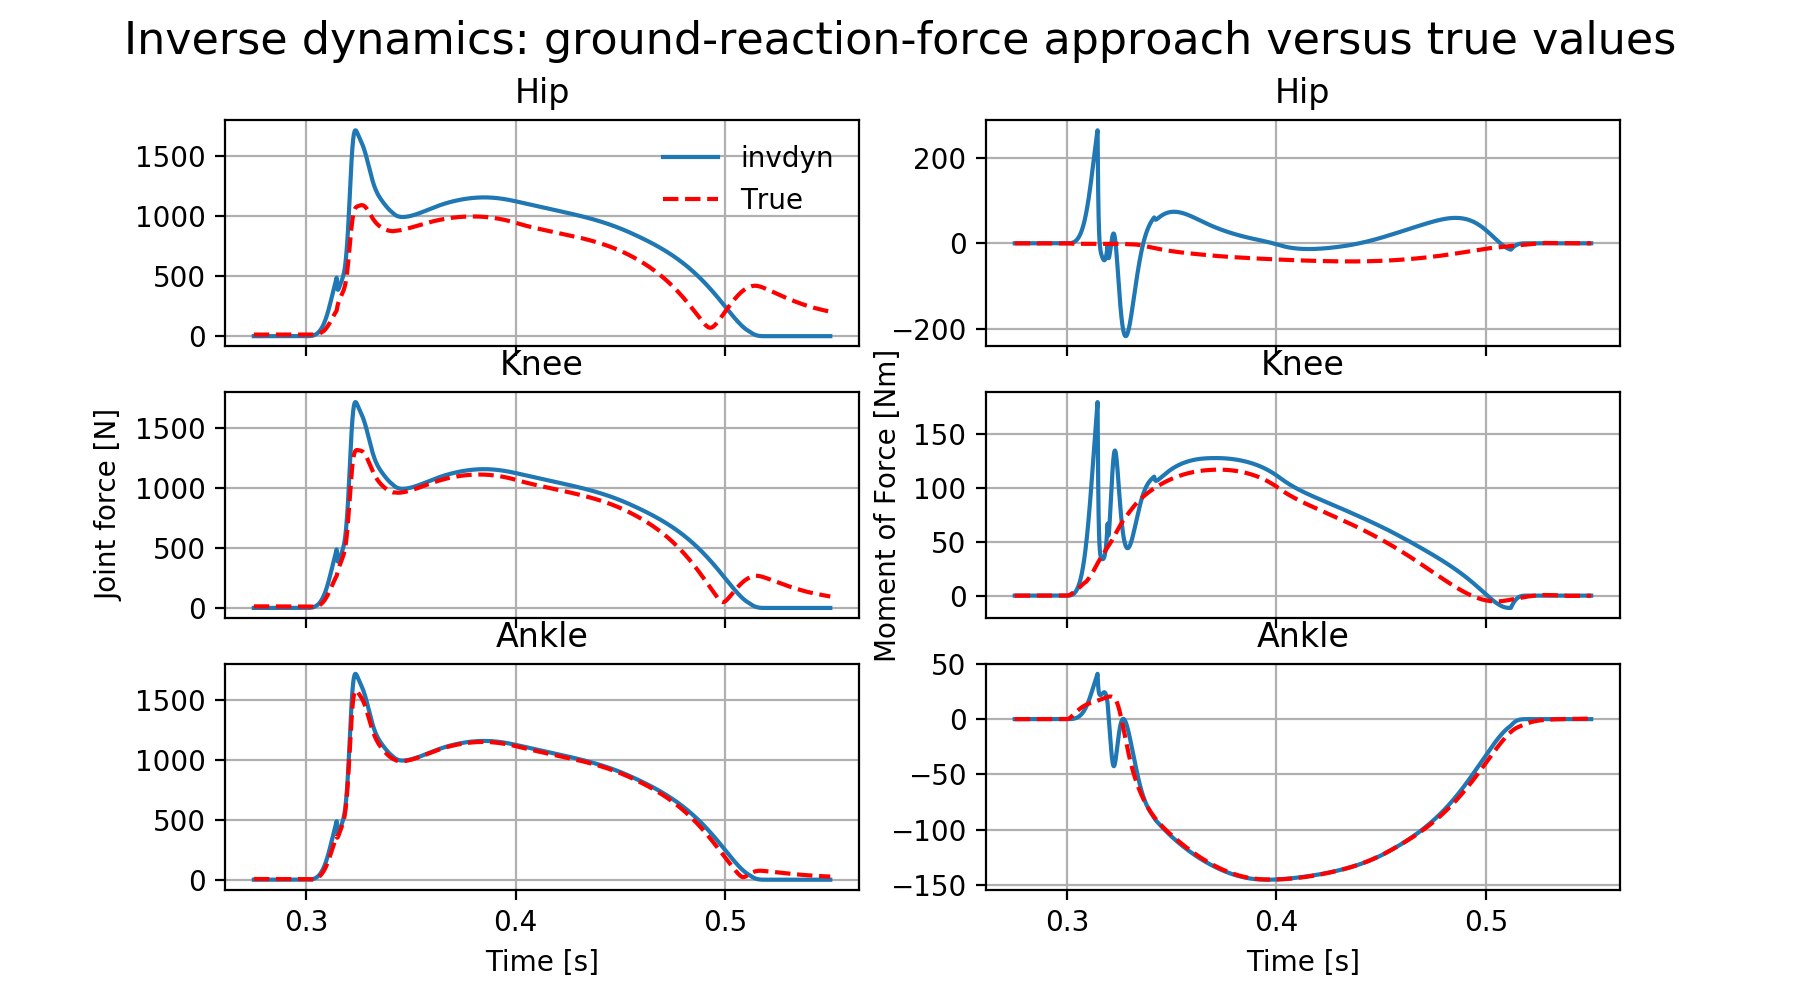

In [17]:
# ankle
[Fagrf, Magrf] = invdyn2d(rcm[:, (4, 5)], grf[:, (2, 2)]*[1, 0], kin[:, (4, 5)], acm[:, (4, 5)]*0, \
                          aang[:, 2]*0, 0, 0, grf[:,(0,1)], 0)
# knee
[Fkgrf, Mkgrf] = invdyn2d(rcm[:, (2, 3)], kin[:, (4, 5)], kin[:,(2,3)], acm[:, (2, 3)]*0, \
                          aang[:, 1]*0, 0, 0, -Fagrf, -Magrf)
# hip
[Fhgrf, Mhgrf] = invdyn2d(rcm[:, (0, 1)], kin[:, (2, 3)], kin[:, (0, 1)], acm[:, (0, 1)]*0, \
                          aang[:, 0]*0, 0, 0, -Fkgrf, -Mkgrf)

# magnitude of the calculated hip, knee, and ankle resultant joint force
Fagrfm = np.sqrt(np.sum(np.abs(Fagrf)**2, axis=-1))
Fkgrfm = np.sqrt(np.sum(np.abs(Fkgrf)**2, axis=-1))
Fhgrfm = np.sqrt(np.sum(np.abs(Fhgrf)**2, axis=-1))

plotdata(time, Fhgrfm, Fkgrfm, Fagrfm, Mhgrf, Mkgrf, Magrf, forces, moments, 
         'Inverse dynamics: ground-reaction-force approach versus true values')

Neglecting all the accelerations and the weight of the segments means that the only external force that actuates on the system is the ground reaction force, which although is only actuating at the foot-ground interface it will be transmitted to the other segments through the joint forces.  Because of that, the joint forces on the ankle, knee, and hip will simply be minus the ground reaction force. Note that the forces shown above for the three joints are the same and equal to:  

$$\sqrt{GRF_x^2+GRF_y^2}$$

These simplifications also mean that the moments of force could have been simply calculated as the cross product between the vector position of the the COP in relation to the joint and the GRF vector:   

$$ \mathbf{M_{a}} = -cross(\mathbf{COP}-\mathbf{r_{a}},\mathbf{GRF}) $$

$$ \mathbf{M_{k}} = -cross(\mathbf{COP}-\mathbf{r_{k}},\mathbf{GRF}) $$

$$ \mathbf{M_{h}} = -cross(\mathbf{COP}-\mathbf{r_{h}},\mathbf{GRF}) $$

Where $\mathbf{r_{i}}\;$ is the position vector of joint i.

Let's calculate the variables in this way:

<IPython.core.display.Javascript object>


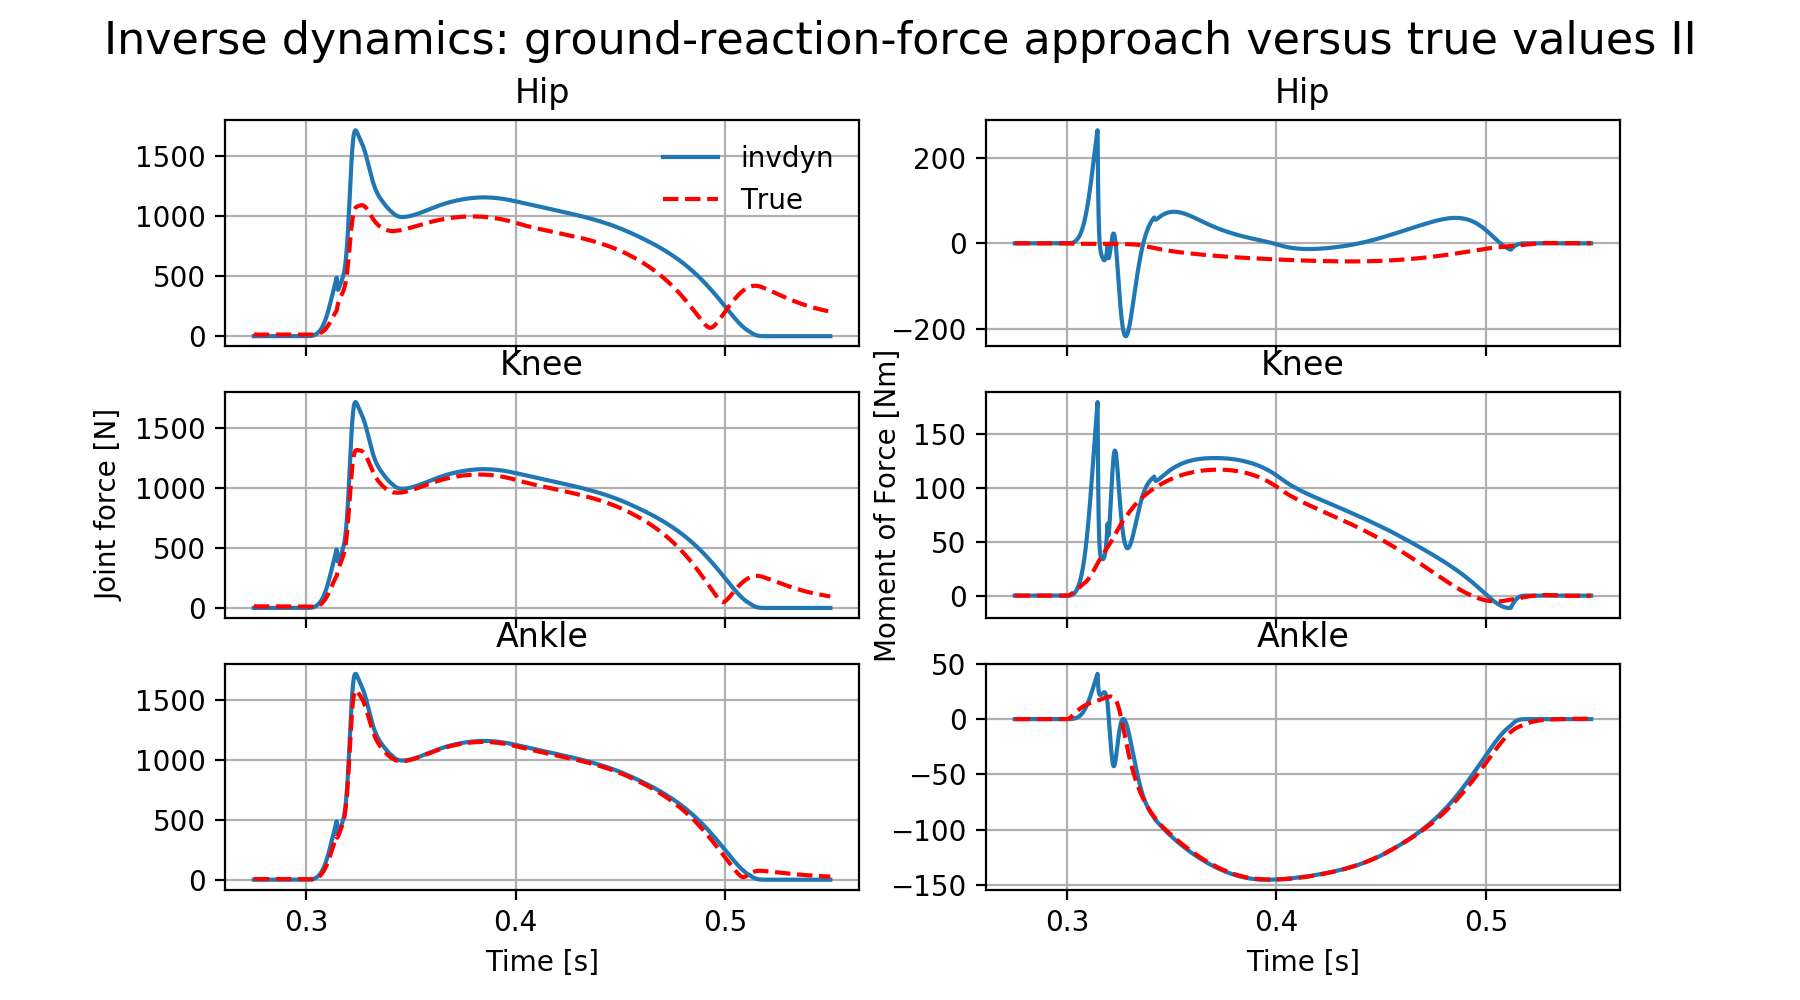

In [18]:
Fhgrfm2 = Fkgrfm2 = Fagrfm2 = np.sqrt(np.sum(np.abs(-grf[:, (0, 1)])**2, axis=-1))
Magrf2  = -np.cross(grf[:, (2, 2)]*[1, 0]-kin[:, (4, 5)], grf[:, (0, 1)])
Mkgrf2  = -np.cross(grf[:, (2, 2)]*[1, 0]-kin[:, (2, 3)], grf[:, (0, 1)])
Mhgrf2  = -np.cross(grf[:, (2, 2)]*[1, 0]-kin[:, (0, 1)], grf[:, (0, 1)])

plotdata(time, Fhgrfm2, Fkgrfm2, Fagrfm2, Mhgrf2, Mkgrf2, Magrf2, forces, moments, 
         'Inverse dynamics: ground-reaction-force approach versus true values II')

## Conclusion

For these data set of 'running' (remember this is simulated data), in the estimation of the forces and moments of force at the hip, knee, and ankle joints in a two-dimensional analysis, to not consider the segment acceleration and/or the mass of the segments had no effect on the ankle variables, a small effect on the knee, and a large effect on the hip.    
This is not surprising; during the support phase, ankle and knee have small movements and the mass of the segments only start to have a significant contribution for more proximal and heavy segments such as the thigh.   

Don't get disappointed thinking that all this work for drawing the complete FBDs and their correspondent equations was a waste of time.    
Nowadays, the state of the art and the demand for higher accuracy in biomechanics is such that such simplifications are usually not accepted.   

## Problems

1. Collect or search for some experimental data from a movement analysis and perform inverse dynamics to determine joint forces and torques.

## References

- Ruina A, Rudra P (2013) [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press.    
- Winter DA (2009) [Biomechanics and motor control of human movement](http://books.google.com.br/books?id=_bFHL08IWfwC). 4 ed. Hoboken, EUA: Wiley. 
- Zajac FE, Gordon ME (1989) [Determining muscle's force and action in multi-articular movement](https://drive.google.com/open?id=0BxbW72zV7WmUcC1zSGpEOUxhWXM&authuser=0). Exercise and Sport Sciences Reviews, 17, 187-230.  
- Zatsiorsky VM (2202) [Kinetics of human motion](http://books.google.com.br/books?id=wp3zt7oF8a0C&lpg=PA571&ots=Kjc17DAl19&dq=ZATSIORSKY%2C%20Vladimir%20M.%20Kinetics%20of%20human%20motion&hl=pt-BR&pg=PP1#v=onepage&q&f=false). Champaign, IL: Human Kinetics.